## Semillero de Programación en Ciencias Sociales (Sesión 6)
### Felipe Botero, Laura Merchán y Wilson Forero

In [1]:
#!pip install spacy
#!python -m spacy download es
#!pip install wordcloud
#!pip install stop_words

#### El objetivo de esta clase es conocer los conceptos básicos de minería de texto y aplicarlos al texto de las sentencias de la Corte Constitucional descargadas la clase pasada.

### Paquetes que vamos a utilizar:

**[1.OS](https://docs.python.org/3/library/os.html):** Permite interactuar con el sistema operativo. Lo usaremos para manipular la estructura de directorios (Crear o eliminar directorios o archivos).

**[2.BeautifulSoup:](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)** La estrella de hoy. Es una librería especializada en extraer información de la web.

**[3.RegEx:](https://www.w3schools.com/python/python_regex.asp)** Permite trabajar con [expresiones regulares](https://en.wikipedia.org/wiki/Regular_expression).Las expresiones regulares son una serie de convenciones para simplificar la búsqueda de strings que siguen algunos patrones.

**[4.Pandas](https://pandas.pydata.org/)** La librería insignia de  python para manipular datos.

**[5.Spacy](https://spacy.io/)** La librería insignia de  python para manipular datos textuales

**[6.wordcloud](https://amueller.github.io/word_cloud/)** Una  librería muy sencillita para crear wordclouds



In [2]:
import os
from bs4 import BeautifulSoup
import re
import altair as alt
import pandas as pd
import spacy
from wordcloud import WordCloud
from stop_words import get_stop_words
import matplotlib.pyplot as plt
import string
from collections import Counter

Lo primero que hacemos es crear una lista de los archivos que tenemos en nuestra carpeta de sentencias

In [3]:
files = os.listdir("./sentencias_aborto/")

Vamos a hacer una prueba  con el primer archivo.
- Con *open* abrimos nuestro archivo. El encoding puede variar, pero debe ser "latin-1" o "UTF-8".
- Con *BeautifulSoup* organizamos la información en una estructura jerárquica de  acuerdo a la estructura del código *html* del archivo.
- Con *soup.prettify* podemos ver esta estructura. Pueden visitar este [link](https://www.w3schools.com/TAGS/tag_a.asp) comprender mejor el código html.

In [4]:
f = open(str("./sentencias_aborto/"+files[0]), encoding="Windows-1252")     
soup = BeautifulSoup(f, "html.parser")
f.close()

In [5]:
print(soup.prettify())

<script language="JavaScript1.2" src="/relatoria/encabezado.js">
</script>
<a href="/sentencias/1995/T-477-95.rtf ">
 <img src="/images/word.jpg"/>
 T-477-95
</a>
<div class="amplia">
 <br/>
 <hr/>
 <html>
  <head>
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
   <meta content="Microsoft Word 12 (filtered)" name="Generator"/>
   <title>
    Sentencia No. T-477/95
   </title>
   <style>
    <!--
 /* Font Definitions */
 @font-face
	{font-family:"Cambria Math";
	panose-1:2 4 5 3 5 4 6 3 2 4;}
@font-face
	{font-family:"Roman PS";
	panose-1:0 0 0 0 0 0 0 0 0 0;}
@font-face
	{font-family:"Roman 12cpi";
	panose-1:0 0 0 0 0 0 0 0 0 0;}
 /* Style Definitions */
 p.MsoNormal, li.MsoNormal, div.MsoNormal
	{margin:0cm;
	margin-bottom:.0001pt;
	text-autospace:none;
	font-size:10.0pt;
	font-family:"Times New Roman","serif";}
h1
	{mso-style-link:"Título 1 Car";
	margin-top:0cm;
	margin-right:16.75pt;
	margin-bottom:0cm;
	margin-left:0cm;
	margin-bottom:.0001pt;
	text-align:

### Extraer el texto
Manipularemos el HTML para extraer el texto de la sentencia. Para esto utilizaremos las funciones *find_all()* y filtraremos por los tags de HTML que contienen texto relevante

In [6]:

texto= soup.find_all(text=True)

In [7]:
texto

[' ',
 ' ',
 ' ',
 ' ',
 ' T-477-95 ',
 ' ',
 ' ',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'Sentencia No. T-477/95',
 '\n',
 '\n<!--\n /* Font Definitions */\n @font-face\n\t{font-family:"Cambria Math";\n\tpanose-1:2 4 5 3 5 4 6 3 2 4;}\n@font-face\n\t{font-family:"Roman PS";\n\tpanose-1:0 0 0 0 0 0 0 0 0 0;}\n@font-face\n\t{font-family:"Roman 12cpi";\n\tpanose-1:0 0 0 0 0 0 0 0 0 0;}\n /* Style Definitions */\n p.MsoNormal, li.MsoNormal, div.MsoNormal\n\t{margin:0cm;\n\tmargin-bottom:.0001pt;\n\ttext-autospace:none;\n\tfont-size:10.0pt;\n\tfont-family:"Times New Roman","serif";}\nh1\n\t{mso-style-link:"Título 1 Car";\n\tmargin-top:0cm;\n\tmargin-right:16.75pt;\n\tmargin-bottom:0cm;\n\tmargin-left:0cm;\n\tmargin-bottom:.0001pt;\n\ttext-align:justify;\n\ttext-justify:inter-ideograph;\n\tpage-break-after:avoid;\n\ttext-autospace:none;\n\tfont-size:12.0pt;\n\tfont-family:"Roman 12cpi";}\np.MsoFootnoteText, li.MsoFootnoteText, div.MsoFootnoteText\n\t{mso-style-link:"Texto nota pie Car";\n\tmar

In [8]:
type(texto)

bs4.element.ResultSet

In [9]:
set([t.parent.name for t in texto])

{'[document]',
 'a',
 'b',
 'body',
 'div',
 'head',
 'html',
 'i',
 'script',
 'span',
 'style',
 'title',
 'u'}

In [10]:
tag=''
for t in texto:
    if t.parent.name in ['u']:
        tag +=str(" " + format(t)) 
tag

' policitante policitado Fallo\ninicial de primera instancia (anulado posteriormente) Declaratoria\nde nulidad su obligación es de medio Nuevo fallo\nde primera instancia pero en abstracto concretamente Pruebas\npracticadas por la Corte Constitucional Diligencias\npracticadas en el Municipio donde vive el menor Criterios\ncientíficos De la\nAcademia\xa0 de Medicina, en lo que tiene que ver con la solución a la mutilación\nque sufrió el niño. Del\nsexólogo Alonso Acuña Cañas Otros\naspectos:  De la\nsicóloga Lucila Amparo Céspedes Decisión de\nreserva Competencia Temas\njurídicos Para que\nsurja una relación con proyección jurídica entre el médico y su paciente se\nrequiere acuerdo de voluntades hacia una prestación de servicios cualidades\nprimarias El proceso\nvolitivo policitante policitado fue revisado a fondo El\nconsentimiento informado La\nurgencia en el tratamiento No pueden\nlos médicos practicar la readecuación de sexo de un\xa0 menor, justificando su\nactuación con la autoriz

In [11]:
blacklist = ['[document]',
 'body',
 'div',
 'head',
 'html',
 'script',
 'style'
 ]

In [12]:
texto_limpio=''
for t in texto:
    if t.parent.name not in blacklist:
        texto_limpio += str(" " +format(t))

In [13]:
texto_limpio

'    T-477-95  Sentencia No. T-477/95 Sentencia\nNo. T-477/95 \xa0 \xa0 NULIDAD POR FALTA\nDE NOTIFICACION DE TUTELA -Iniciación\nde la acción \xa0 Cuando una tutela\nse dirige contra particulares, el juez debe informarles a éstos que se ha\niniciado un proceso en su contra y que pueden hacer uso de las garantías que la\nConstitución Política les otorga.\xa0 El no hacerlo genera una nulidad de lo\nactuado por violación al debido proceso, dado el carácter relevante de la\nomisión. \xa0 READECUACION DE\nSEXO DEL MENOR/CONSENTIMIENTO DEL PACIENTE -Cambio de sexo /TEORIA DE LA INFORMACION -Cambio\nde sexo \xa0 La obligación\ncontractual o extracontractual del médico respecto del ser humano a quien va a\ntratar, buscando su CURACION es una prestación de servicios que produce\nobligaciones de medio y no de resultado, enmarcada en el CONSENTIMIENTO,\nentendiendo por tal el acuerdo de voluntades sobre un mismo objeto jurídico. El\nproblema del consentimiento adquiere relevancia jurídica cuando

#### Utilizaremos SpaCy para identificar las oraciones que contengan una palabra

In [14]:
nlp=spacy.load('es_core_news_sm')
doc=nlp(texto_limpio)


In [15]:
doc

    T-477-95  Sentencia No. T-477/95 Sentencia
No. T-477/95     NULIDAD POR FALTA
DE NOTIFICACION DE TUTELA -Iniciación
de la acción   Cuando una tutela
se dirige contra particulares, el juez debe informarles a éstos que se ha
iniciado un proceso en su contra y que pueden hacer uso de las garantías que la
Constitución Política les otorga.  El no hacerlo genera una nulidad de lo
actuado por violación al debido proceso, dado el carácter relevante de la
omisión.   READECUACION DE
SEXO DEL MENOR/CONSENTIMIENTO DEL PACIENTE -Cambio de sexo /TEORIA DE LA INFORMACION -Cambio
de sexo   La obligación
contractual o extracontractual del médico respecto del ser humano a quien va a
tratar, buscando su CURACION es una prestación de servicios que produce
obligaciones de medio y no de resultado, enmarcada en el CONSENTIMIENTO,
entendiendo por tal el acuerdo de voluntades sobre un mismo objeto jurídico. El
problema del consentimiento adquiere relevancia jurídica cuando, como en el
asunto que motiva est

In [16]:
#Para tokenizar oraciones
oraciones={}
for num,oracion in enumerate(doc.sents):
    oraciones[num]= oracion

In [17]:
oraciones_buscadas=[]
for oracion in oraciones.values():
    if "aborto"in oracion.text.lower():
        oraciones_buscadas.append(oracion)

In [18]:
oraciones_buscadas

[Principia el fallo
 por resaltar, en forma categórica,  pero en abstracto , la defensa de los
 derechos del menor; dice que se debe respetar la dignidad de las personas,
 quienes no pueden ser objeto  de trato degradante; explica el concepto de
 autonomía y defiende el libre desarrollo de la personalidad; agrega un extenso
 estudio sobre la personalidad jurídica y su derecho a tener una identidad;
 explica cuáles son los derechos del paciente frente a las intervenciones
 quirúrgicas; hace varias citas de tratadistas, entre ellas una que dice que es
 irrelevante e ineficaz la autorización en varios casos como la eutanasia, el
 aborto, la modificación de sexo, y otra que dice que en el mundo sólo hay 5
 ordenamientos jurídicos que permiten “después de cumplir muchos requisitos la
 adecuación sexual”, y remata con un capítulo sobre “El médico y el respeto a la
 dignidad humana” de la cual se deduce que el cuerpo humano no puede estar
 sometido a vejámenes y si el médico lo hace viola el 

#### Utilizaremos WordCloud para identificar las palabras más frecuentes en una sentencia y hacer una nube de palabras

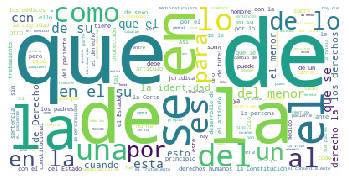

In [19]:
wordcloud = WordCloud(background_color ='white').generate(texto_limpio) 
  
# plot the WordCloud image                        
plt.figure() 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.savefig('./gráfica1.png')
plt.show() 

In [20]:
stopwords_es= get_stop_words('es')
stopwords_es

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

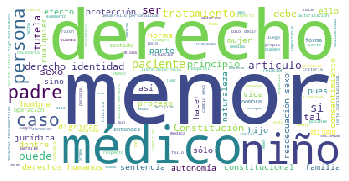

In [21]:
wordcloud = WordCloud(background_color ='white',stopwords=stopwords_es).generate(texto_limpio) 
  
# plot the WordCloud image                        
plt.figure() 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.savefig('./gráfica1.png')
plt.show() 

In [22]:
lista_palabras=""
pos_tag_target=["VERB"]
for palabra in doc:
    if palabra.text not in string.punctuation :
        if palabra.pos_ in pos_tag_target:
            lista_palabras=lista_palabras +" "+palabra.text.lower()
lista_palabras

' dirige hacer otorga genera dado va tratar buscando produce entendiendo adquiere motiva afirmar prevenir celebrado ofrecía aceptar recibir principia dada tratar recibe decirse consumado llamado recibir quede parte dada existe informe corre quedarían minimizar alarmar desalentaría apuntar busca mejorar superar mitigar llamado permite escoger tomar devenir tiene actuar sustituido preservar surgir exige evitar responder efectuar motiva vendría pusiera sustituyera buscaron dieron procedió operar entrar estudiar firmaron autorizaban “ incluyendo conlleve mejorar tomar quiere tomar tiene considera derivan consentir proteger tomar indicado establecer considera considerados establecido aceptado afectan caracterizan afecta incluye tienen predeterminan llegar permite identificar menor nace ejercitar sacrifica cercenó aleja quedó destruye forma constituye consentir dicen desfigurada vive haga determinan cabe cupiera nació ubica tendría cobarde decidieron tendría permanecer señaló desvirtuaría pe

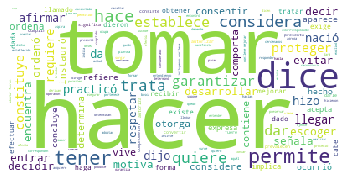

In [23]:
wordcloud = WordCloud(background_color ='white',stopwords=stopwords_es).generate(lista_palabras) 
  
# plot the WordCloud image                        
plt.figure() 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.savefig('./gráfica1.png')
plt.show()

### Algunas preguntas que podemos responder con estas herramientas:

1. ¿Cuáles sentencias mencionan la palabra "aborto" más de 5 veces?
2. ¿Qué sentencias usan la expresión salud mental?
3. ¿Qué adjetivos utilizan para describir una palabra?

In [24]:
textos_sentencias={}
for file in files:
    f = open(str("./sentencias_aborto/"+file), encoding="Windows-1252")     
    soup = BeautifulSoup(f, "html.parser")
    f.close()
    texto= soup.find_all(text=True)
    texto_limpio=''
    for t in texto:
        if t.parent.name not in blacklist:
            texto_limpio += str(" " +format(t))
    textos_sentencias[file]=texto_limpio

In [25]:
sentencias_aborto_masde5=[]
for file in textos_sentencias.keys():
    count=textos_sentencias[file].count('aborto')
    if count >=5:
        sentencias_aborto_masde5.append(file)

In [26]:
len(sentencias_aborto_masde5)

82

In [30]:
sentencias_aborto_sm=[]
for file in textos_sentencias.keys():
    count=textos_sentencias[file].count('salud mental')
    if count >=5:
        sentencias_aborto_sm.append(file)

In [31]:
sentencias_aborto_sm

['T-045-10.htm',
 'C-355-06.htm',
 'T-301-16.htm',
 'A038-12.htm',
 'SU096-18.htm',
 'T-959-11.htm',
 'C-313-14.htm',
 'A009-15.htm',
 'T-731-16.htm',
 'T-841-11.htm']